In [10]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns

import matplotlib.pyplot as plt

df = pd.read_csv('train.csv')
df = df.drop(columns=['Unnamed: 0', 'tenure_months', 'tenure_nml', 'monthly_charges_nml', 'total_charges_nml'])

In [21]:
# What does the customer who churns look like?
with pd.option_context('display.max_columns', None):
    display(df[df.churn == 'Yes'].describe())

,tenure,monthly_charges,total_charges,senior_citizen,gender_enc,family_support,phone_service_enc,contract_type_id,internet_service_type_id,extra_lines,internet_services,has_internet,online_security_enc,online_backup_enc,device_protection_enc,tech_support_enc,streaming_tv_enc,streaming_movies_enc,paperless_billing_enc,pay_elec_check,pay_mail,pay_bank,pay_cc,pay_auto
count,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000,392.000
mean,19.311,76.133,1667.299,0.247,0.472,0.712,0.936,1.191,1.834,1.426,2.776,0.941,0.173,0.291,0.298,0.191,0.436,0.444,0.709,0.556,0.158,0.138,0.148,0.286
std,20.795,24.157,2014.101,0.432,0.500,0.897,0.245,0.476,0.506,0.611,1.636,0.235,0.379,0.455,0.458,0.394,0.497,0.497,0.455,0.497,0.365,0.345,0.356,0.452
min,1.000,19.400,19.400,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2.000,64.200,156.100,0.000,0.000,0.000,1.000,1.000,2.000,1.000,2.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,10.000,80.450,738.650,0.000,0.000,0.000,1.000,1.000,2.000,1.000,2.500,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000
75%,32.250,95.100,2657.650,0.000,1.000,1.000,1.000,1.000,2.000,2.000,4.000,1.000,0.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,1.000
max,72.000,118.350,8684.800,1.000,1.000,3.000,1.000,3.000,3.000,2.000,7.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [22]:
# What does the customer who hasn't churned look like?
with pd.option_context('display.max_columns', None):
    display(df[df.churn == 'No'].describe())

,tenure,monthly_charges,total_charges,senior_citizen,gender_enc,family_support,phone_service_enc,contract_type_id,internet_service_type_id,extra_lines,internet_services,has_internet,online_security_enc,online_backup_enc,device_protection_enc,tech_support_enc,streaming_tv_enc,streaming_movies_enc,paperless_billing_enc,pay_elec_check,pay_mail,pay_bank,pay_cc,pay_auto
count,1017.000,1017.000,1017.000,1017.000,1017.000,1017.000,1017.000,1017.000,1017.000,1017.000,1017.000,1017.000,1017.000,1017.000,1017.000,1017.000,1017.000,1017.000,1017.000,1017.000,1017.000,1017.000,1017.000,1017.000
mean,37.955,60.986,2562.750,0.124,0.501,0.978,0.901,1.908,1.920,1.312,2.869,0.712,0.338,0.380,0.357,0.324,0.364,0.394,0.521,0.240,0.264,0.240,0.257,0.497
std,24.088,31.426,2326.539,0.330,0.500,0.976,0.299,0.862,0.806,0.643,2.325,0.453,0.473,0.486,0.479,0.468,0.481,0.489,0.500,0.427,0.441,0.427,0.437,0.500
min,0.000,18.250,18.850,0.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,15.000,24.750,578.500,0.000,0.000,0.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,40.000,64.750,1697.700,0.000,1.000,1.000,1.000,2.000,2.000,1.000,3.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000
75%,61.000,88.200,4348.100,0.000,1.000,2.000,1.000,3.000,3.000,2.000,5.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,0.000,1.000,1.000
max,72.000,117.350,8477.700,1.000,1.000,3.000,1.000,3.000,3.000,2.000,7.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


Churned:
    - Has been with company shorter time
    - Pays more per month
    - Is single
    - Has a month-to-month contract
    - Pays by electronic check

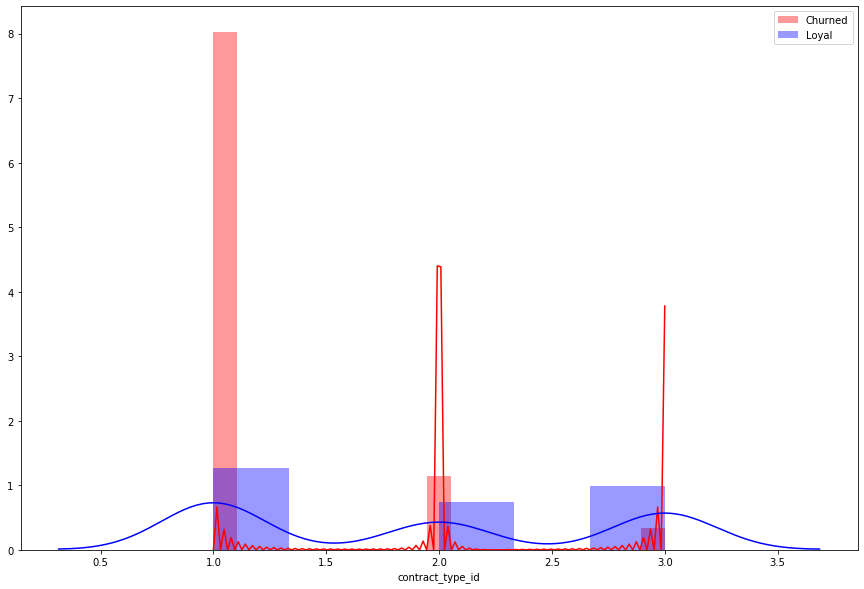

In [31]:
plt.figure(figsize=(15,10))
sns.distplot( df[df.churn == 'Yes'].contract_type_id , color="red", label="Churned")
sns.distplot( df[df.churn == 'No'].contract_type_id , color="blue", label="Loyal")
plt.legend()
 
plt.show()

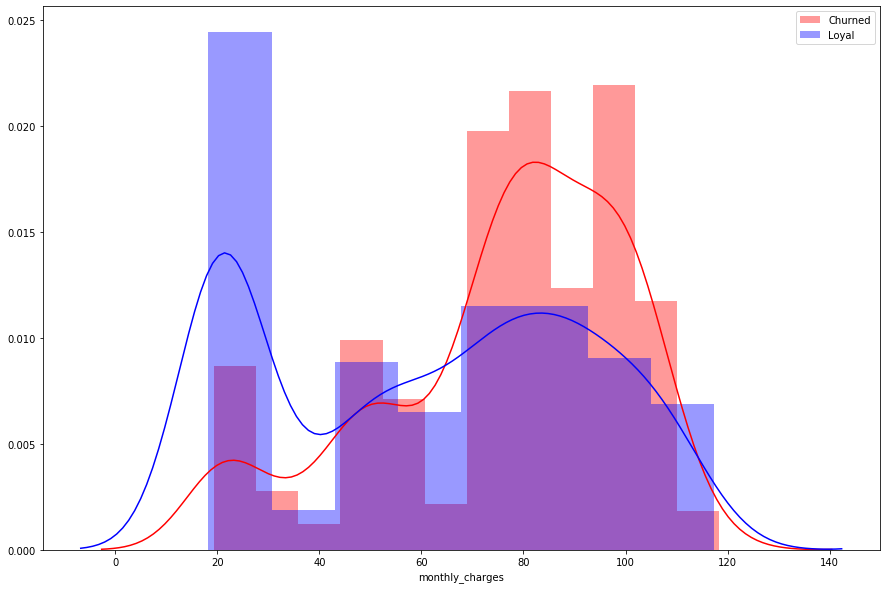

In [30]:
plt.figure(figsize=(15,10))
sns.distplot( df[df.churn == 'Yes'].monthly_charges , color="red", label="Churned")
sns.distplot( df[df.churn == 'No'].monthly_charges  , color="blue", label="Loyal")
plt.legend()
 
plt.show()